In [2]:
import pandas as pd

df = pd.read_csv("concat_data2.csv", na_values=['-'])

df

,Unnamed: 0,2019-12-01 00:00,2019-12-01 00:30,2019-12-01 01:00,2019-12-01 01:30,2019-12-01 02:00,2019-12-01 02:30,2019-12-01 03:00,2019-12-01 03:30,2019-12-01 04:00,...,2021-02-01 19:00,2021-02-01 19:30,2021-02-01 20:00,2021-02-01 20:30,2021-02-01 21:00,2021-02-01 21:30,2021-02-01 22:00,2021-02-01 22:30,2021-02-01 23:00,2021-02-01 23:30
0,0,0.000,0.010,0.000,0.000,0.000,0.000,0.010,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,1,7.249,7.283,7.299,7.271,7.315,7.438,7.458,7.414,7.409,...,3.847,3.277,4.074,3.591,3.846,3.243,3.585,3.982,3.267,3.145
2,2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,3,0.002,0.002,0.002,0.003,0.002,0.002,0.003,0.002,0.003,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.360,1.290,1.310,1.330,1.200,1.290,1.220,1.270,1.180,1.180
105,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.400,0.840,0.920,0.850,0.630,0.660,0.460,0.790,0.840,0.980
106,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.302,0.305,0.308,0.310,0.312,0.316,0.315,0.314,0.317,0.325
107,107,0.028,0.067,0.017,0.025,0.058,0.019,0.019,0.057,0.032,...,0.122,0.117,0.091,0.120,0.100,0.082,0.072,0.075,0.067,0.073


In [8]:
# columns = []
# for i in range(2, len(df.columns)):
#     g = df.columns[i].split("-")
#     g[0] = str(int(g[0])-1)
#     g = "-".join(g)
#     columns.append(g)
    
# g  
# df = df.iloc[:, 2::]
# df.columns = columns
# df.to_csv("concat_data2.csv")

In [3]:
# параметры 
s_day =  1 # период сезонности
s_week = 7
s_month = 31
idx_start = -31*4
d = 31
d_day = 1
idx_start_reg = -31*4
idx_end = -d
idx_end_end = -d

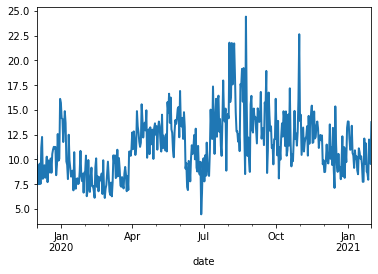

In [5]:
from matplotlib import pyplot as plt
import numpy as np
import random 
import datetime




data = df.iloc[random.choice(range(len(df))), ::]
while data.isnull().values.any():
    data = df.iloc[random.choice(range(len(df))), ::]
        
data = pd.DataFrame(data = {"date":df.columns, "values": data})[1:]
data['date'] = pd.to_datetime(data['date'])


per = data['date'].dt.to_period("d")
data = data.groupby(per)
data_real = data.sum()[:-1]
data = data.mean()[:-1]

data_t_cut =data_real[:-31*3]

ax=data_real['values'].plot(linewidth = 2)
# print(full_test(np_data, 31*5, d, 50, Composition(comp_models)))


In [6]:
from scipy.optimize import minimize

def MSAE(real, pred):
    return np.power(real-pred, 2).mean()


def MAE(real, pred):
    return abs(real-pred).mean()

def NMAE(real, pred):
    k = 2
    return np.where(real > pred, k*abs(real-pred), abs(real-pred)).mean()


def MRE(predicted, real):
    return abs(real - predicted).sum()/(real.sum())

def error_vec(predicted, real):
    return np.abs(real - predicted)/real

0.38295581577476595
0.32321224456810477


<AxesSubplot:xlabel='date'>

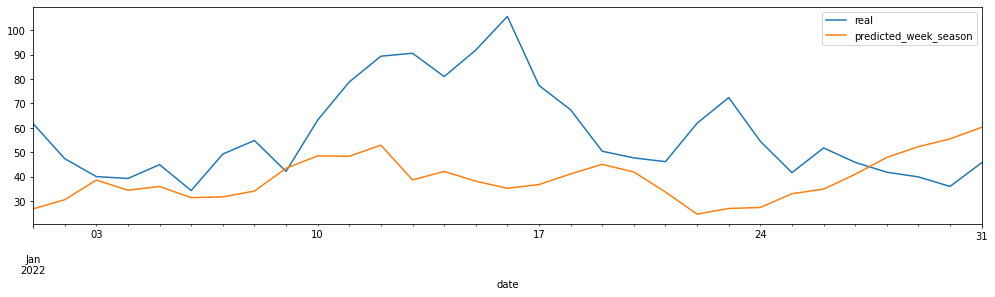

In [37]:
"""Модель с учетом линейного тренда и аддитивной сезонности"""

class LinTrendAddSeason:
    """
     s - длина сезонности
    """
    
    def __init__(self, s):
        self.error_v = None
        self.s = s
        self.alpha = [0.5, 0.5, 0.5]
        self.y = None
        
        
        
    """
    Функция выполняющая предсказание на d шагов вперед по данным y (np.array) ,
    d - горизонт прогнозирования
    
    Возвращает прогноз на d дней
    
    Вызывать только после fit()
    """
    
    def predict(self, d):  # slide 14
        n = self.y.shape[0]
        a = np.zeros(n)
        b = np.zeros(n)
        theta = np.zeros(n)
        for t in range(self.s):
            theta[t] = self.y[t]
            a[t] = self.y[t]

        for t in range(self.s, n):
            a[t] = self.alpha[0] * (self.y[t] - theta[t - self.s]) + (1 - self.alpha[0]) * (a[t - 1] + b[t - 1])
            b[t] = self.alpha[1] * (a[t] - a[t - 1])+(1 - self.alpha[1]) * b[t - 1]
            theta[t] = self.alpha[2] * (self.y[t] - a[t]) + (1 - self.alpha[2]) * theta[t - self.s]

        y_predicted = pd.Series(np.concatenate((self.y, np.zeros(d))))
        for t in range(n, n + d):
            y_predicted[t] = (a[t - d]+(b[t - d] * d)) + theta[t - d + (d % self.s) - self.s]
        return np.array(y_predicted[n:])
    
    
    """
    Метод для подбора парметров. Пока топорно выбирается лучшие параметры от 0 до 1\
    y - данные для обучения
    d - горизонт прогнозирования
    
    Метод выбирает оптимальный параметр alpha и тестовую ошибку error_v
    """
    def fit(self, y, d):
        self.y = y
        min_error = 100000

        for alpha in range(10):
            for beta in range(10):
                for gamma in range(10):
                    train = self.y[:-d]
                    test = self.y[-d:]
                    predicted_next_values = self.__test_predict(np.array([alpha/10, beta/10, gamma/10]), len(test))
                    e = error_vec(predicted_next_values, np.array(test))
                    if e.mean() < min_error:
                        min_error = e.mean()
                        self.error_v = e
                        self.alpha = np.array([alpha/10, beta/10, gamma/10])
                        
    
    def __test_predict(self, alpha, d):  # slide 14
        n = self.y.shape[0]
        a = np.zeros(n)
        b = np.zeros(n)
        theta = np.zeros(n)
        for t in range(self.s):
            theta[t] = self.y[t]
            a[t] = self.y[t]

        for t in range(self.s, n):
            a[t] = alpha[0] * (self.y[t] - theta[t - self.s]) + (1 - alpha[0]) * (a[t - 1] + b[t - 1])
            b[t] = alpha[1] * (a[t] - a[t - 1])+(1 - alpha[1]) * b[t - 1]
            theta[t] = alpha[2] * (self.y[t] - a[t]) + (1 - alpha[2]) * theta[t - self.s]

        y_predicted = pd.Series(np.concatenate((self.y, np.zeros(d))))
        for t in range(n, n + d):
            y_predicted[t] = (a[t - d]+(b[t - d] * d)) + theta[t - d + (d % self.s) - self.s]
        return np.array(y_predicted[n:])

model = LinTrendAddSeason(s_week)
model.fit(data['values'][idx_start:idx_end], d)
predicted_next_value = model.predict(d)

model1 = LinTrendAddSeason(s_day)
model1.fit(data['values'][idx_start:idx_end], d)
predicted_next_value_day = model.predict(d)

real_next_values = data_real['values'][idx_end:]

results_predict = pd.DataFrame(
    data={
        "real": real_next_values,
        "predicted_week_season": predicted_next_value*48,
    }
)
print(MRE(predicted_next_value*48, real_next_values))
print(abs((predicted_next_value*48).sum() - (real_next_values).sum())/(real_next_values).sum())
results_predict.plot(figsize=(17, 4))


[0.9 0.9]
0.29333586395681843
0.22600870372298934


<AxesSubplot:xlabel='date'>

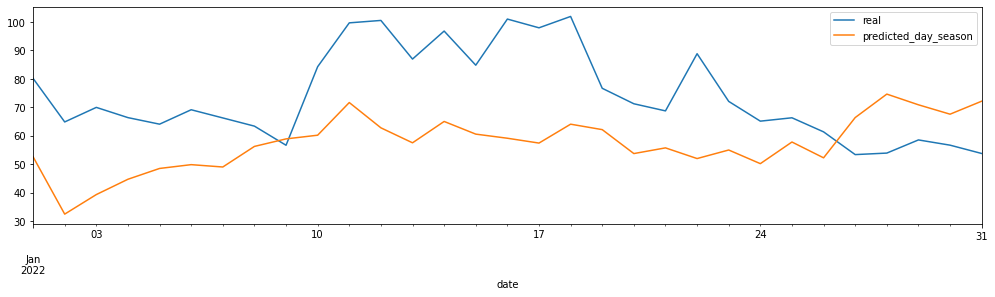

In [196]:
class NoTrendMultiSeason:
    
    def __init__(self, s, alpha=[0.5, 0.5]):
        self.error_v = None
        self.s = s
        self.alpha = alpha
        self.y = None
        

    def predict(self, d):
        n = self.y.shape[0]
    
        a = np.zeros(n)
        theta = np.zeros(n)
        for t in range(self.s):
            theta[t] = self.y[t]
            a[t] = self.y[t]

        for t in range(self.s, n):
            a[t] = self.alpha[0] * (self.y[t] / theta[t - self.s]) + (1 - self.alpha[0]) * a[t - 1]
            theta[t] = self.alpha[1] * (self.y[t] / a[t]) + (1 - self.alpha[1]) * theta[t - self.s]

        y_predicted = pd.Series(np.concatenate((self.y, np.zeros(d))))
        for t in range(n, n + d):
            y_predicted[t] = a[t - d] * theta[t - d + (d % self.s) - self.s]
        return np.array(y_predicted[n:])
    
    def fit(self, y, d):
        self.y = y
        min_error = 100000
        for alpha in range(10):
            for beta in range(10):
                train = y[:-d]
                test = y[-d:]
                predicted_next_values = self.__test_predict(np.array([alpha/10, beta/10]), len(test))
                e = error_vec(predicted_next_values, np.array(test))
                if e.mean() < min_error:
                    min_error = e.mean()
                    self.error_v = e
                    self.alpha = np.array([alpha/10, beta/10])
                    
    def fit_composition(self, y, d):
        self.y = y
        train = self.y[:-d]
        test = self.y[-d:]
        predicted_next_values = self.predict(len(test))
        return error_vec(predicted_next_values, np.array(test))
                    
    def __test_predict(self, alpha, d):
        n = self.y.shape[0]
        a = np.zeros(n)
        theta = np.zeros(n)
        for t in range(self.s):
            theta[t] = self.y[t]
            a[t] = self.y[t]

        for t in range(self.s, n):
            a[t] = alpha[0] * (self.y[t] / theta[t - self.s]) + (1 - alpha[0]) * a[t - 1]
            theta[t] = alpha[1] * (self.y[t] / a[t]) + (1 - alpha[1]) * theta[t - self.s]

        y_predicted = pd.Series(np.concatenate((self.y, np.zeros(d))))
        for t in range(n, n + d):
            y_predicted[t] = a[t - d] * theta[t - d + (d % self.s) - self.s]
        return np.array(y_predicted[n:])

          
        
model = NoTrendMultiSeason(s_week)
model.fit(data['values'][idx_start:idx_end], d)
predicted_next_values = model.predict(d)*48
print(model.alpha)
real_next_values = data_real['values'][idx_end:]

results_predict = pd.DataFrame(
    data={
        "real": real_next_values,
        "predicted_day_season": predicted_next_values

    }
)
print(MRE(predicted_next_values, real_next_values))
print(abs((predicted_next_values).sum() - (real_next_values).sum())/(real_next_values).sum())
results_predict.plot(figsize=(17, 4))

0.13406688096638722
0.05702314517616195


<AxesSubplot:xlabel='date'>

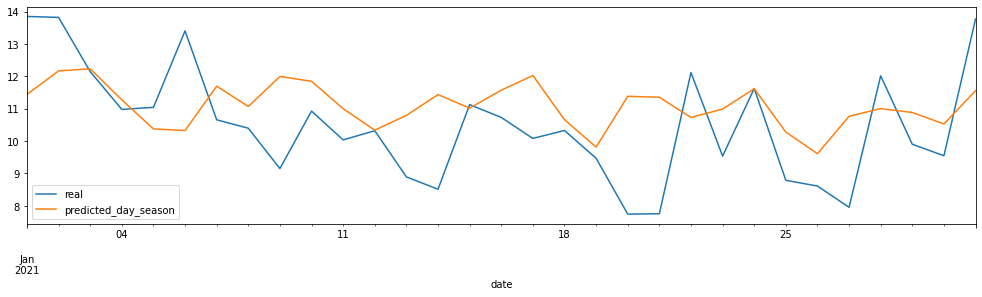

In [7]:
class WintersNoTrend:
    def __init__(self, s):
        self.s = s # период сезонности
        self.a = None
        self.theta = None
        self.n = None
    
    def fit(self, train, alpha):
        self.n = train.shape[0]
    
        self.a = np.zeros(self.n)
        self.theta = np.zeros(self.n)
        m = train.min()
        
        for t in range(self.s):
            self.theta[t] = train[t]
            self.a[t] = train[t]
        
        for t in range(self.s, self.n):
            self.a[t] = alpha[0] * (train[t] / self.theta[t - self.s]) + (1 - alpha[0]) * self.a[t - 1]
            self.theta[t] = alpha[1] * (train[t] / self.a[t]) + (1 - alpha[1]) * self.theta[t - self.s]
    
    def predict(self, d=1):
        y_predicted = np.zeros(d)
        
        for t in range(self.n, self.n + d):
            y_predicted[t - self.n] = self.a[t - d] * self.theta[t - d + (d % self.s) - self.s]
        
        return y_predicted
    
def optimize_alpha(alpha, s, train_data, real_data, d):
    winters_model = WintersNoTrend(s)
    winters_model.fit(train_data, alpha)
    
    return MAE(real_data, winters_model.predict(d)) # your error function
 
result = minimize(
    lambda x: optimize_alpha(x, s_week, data_real['values'][idx_start:2*idx_end], data_real['values'][2*idx_end:idx_end:], d),
    x0=np.array([0.5, 0.5]),
    bounds=[(0, 1), (0, 1)]
)
alpha_optimized = result.x
winters_model = WintersNoTrend(s_week)
winters_model.fit(data['values'][idx_start:idx_end], alpha_optimized)
                  
pred = winters_model.predict(d)*48
real_next_values = data_real['values'][idx_end:]

results_predict = pd.DataFrame(
    data={
        "real": real_next_values,
        "predicted_day_season": pred

    }
)


print(MRE(pred, real_next_values))
print(abs(pred.sum() - real_next_values.sum())/(real_next_values.sum()))
results_predict.plot(figsize=(17, 4))

In [ ]:
class NoTrendMultySeasonTriggLynch:
    def __init__(self, s, alpha=[0.5, 0.5]):
        self.error_v = None
        self.s = s
        self.alpha = alpha
        self.y = None
        self.gamma = 0.05
        

    def predict(self, d):
        n = self.y.shape[0]
        a = np.zeros(n)
        e = np.zeros(n+d)
        e_abs = np.zeros(n+d)
        K = 1
        theta = np.zeros(n)
        for t in range(self.s):
            theta[t] = self.y[t]
            a[t] = self.y[t]

        for t in range(self.s, n):
            a[t] = self.alpha[0] * (self.y[t] / theta[t - self.s]) + (1 - self.alpha[0]) * a[t - 1]
            theta[t] = self.alpha[1] * (self.y[t] / a[t]) + (1 - self.alpha[1]) * theta[t - self.s]
            
            e[t] = self.gamma*(a[t] * theta[t + (d % self.s) - self.s]-self.y[t])+(1-self.gamma)*(e[t-1])
            e_abs[t] = self.gamma*(a[t] * theta[t + (d % self.s) - self.s]-self.y[t])+(1-self.gamma)*(e_abs[t-1])
            if not np.isclose(e_abs[t], 0):
                K = abs(e[t]/e_abs[t])
                self.alpha[0] = K
                
        y_predicted = pd.Series(np.concatenate((self.y, np.zeros(d))))
        for t in range(n, n + d):
            y_predicted[t] = a[t - d] * theta[t - d + (d % self.s) - self.s]
        return np.array(y_predicted[n:])
    
    def fit(self, y, d):
        self.y = y
        min_error = 100000
        for g in range(10):
            train = y[:-d]
            test = y[-d:]
            gamma = 0.5+ ( (0.1-0.05) / 10 ) * g
            predicted_next_values = self.__test_predict(gamma, len(test))
            e = error_vec(predicted_next_values, np.array(test))
            if e.mean() < min_error:
                min_error = e.mean()
                self.error_v = e
                self.gamma = gamma
                
    def fit_composition(self, y, d):
        self.y = y
        train = self.y[:-d]
        test = self.y[-d:]
        predicted_next_values = self.predict(len(test))
        return error_vec(predicted_next_values, np.array(test))
                    
    def __test_predict(self, gamma, d):
        n = self.y.shape[0]
        a = np.zeros(n)
        e = np.zeros(n+d)
        e_abs = np.zeros(n+d)
        K = 1
        theta = np.zeros(n)
        for t in range(self.s):
            theta[t] = self.y[t]
            a[t] = self.y[t]

        for t in range(self.s, n):
            a[t] = self.alpha[0] * (self.y[t] / theta[t - self.s]) + (1 - self.alpha[0]) * a[t - 1]
            theta[t] = self.alpha[1] * (self.y[t] / a[t]) + (1 - self.alpha[1]) * theta[t - self.s]
            
            e[t] = gamma*(a[t] * theta[t + (d % self.s) - self.s]-self.y[t])+(1-gamma)*(e[t-1])
            e_abs[t] = gamma*(a[t] * theta[t + (d % self.s) - self.s]-self.y[t])+(1-gamma)*(e_abs[t-1])
            if not np.isclose(e_abs[t], 0):
                K = abs(e[t]/e_abs[t])
                self.alpha[0] = K
                
        y_predicted = pd.Series(np.concatenate((self.y, np.zeros(d))))
        for t in range(n, n + d):
            y_predicted[t] = a[t - d] * theta[t - d + (d % self.s) - self.s]
        return np.array(y_predicted[n:])

    
model = NoTrendMultySeasonTriggLynch(s_day)
model.fit(data['values'][idx_start:idx_end], d)
predicted_next_values_day = model.predict(d)

real_next_values = np.array(data['values'][idx_end:])

results_predict = pd.DataFrame(
    data={
        "real": real_next_values,
        "predicted_day_season": predicted_next_values_day,

    }
)
print(MRE(predicted_next_values_day, real_next_values))
print(abs((predicted_next_values_day).sum() - (real_next_values).sum())/(real_next_values).sum())
results_predict.plot(figsize=(17, 4))

[0.7 0.  0.9]
0.2527804105390479
0.1165277374283202


<AxesSubplot:>

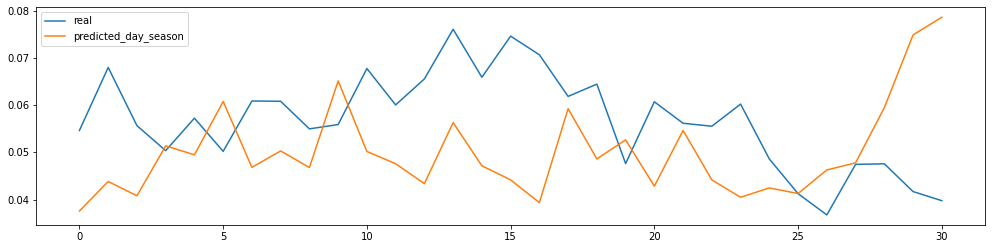

In [145]:
class LinearTrendMultiSeason:
    
    def __init__(self, s):
        self.error_v = None
        self.s = s
        self.alpha = [0.5, 0.5, 0.5]
        self.y = None
        

    def predict(self, d):
        n = self.y.shape[0]
        a = np.zeros(n)
        b = np.zeros(n)
        theta = np.zeros(n)
        for t in range(self.s):
            theta[t] = self.y[t]
            a[t] = self.y[t]

        for t in range(self.s, n):
            a[t] = self.alpha[0] * (self.y[t] / theta[t - self.s]) + (1 - self.alpha[0]) * (a[t - 1] + b[t - 1])
            b[t] = self.alpha[1] * (a[t] - a[t - 1])+(1 - self.alpha[1]) * b[t - 1]
            theta[t] = self.alpha[2] * (self.y[t] / a[t]) + (1 - self.alpha[2]) * theta[t - self.s]

        y_predicted = pd.Series(np.concatenate((self.y, np.zeros(d))))
        for t in range(n, n + d):
            y_predicted[t] = (a[t - d]+(b[t - d] * d)) * theta[t - d + (d % self.s) - self.s]
        return np.array(y_predicted[n:])

    def fit(self, y, d):
        self.y = y
        min_error = 100000

        for alpha in range(10):
            for beta in range(10):
                for gamma in range(10):
                    train = self.y[:-d]
                    test = self.y[-d:]
                    predicted_next_values = self.__test_predict(np.array([alpha/10, beta/10, gamma/10]), len(test))
                    e = error_vec(predicted_next_values, np.array(test))
                    if e.mean() < min_error:
                        min_error = e.mean()
                        self.error_v = e
                        self.alpha = np.array([alpha/10, beta/10, gamma/10])
                    
    def __test_predict(self, alpha, d):
        n = self.y.shape[0]
        a = np.zeros(n)
        b = np.zeros(n)
        theta = np.zeros(n)
        for t in range(self.s):
            theta[t] = self.y[t]
            a[t] = self.y[t]

        for t in range(self.s, n):
            a[t] = alpha[0] * (self.y[t] / theta[t - self.s]) + (1 - alpha[0]) * (a[t - 1] + b[t - 1])
            b[t] = alpha[1] * (a[t] - a[t - 1])+(1 - alpha[1]) * b[t - 1]
            theta[t] = alpha[2] * (self.y[t] / a[t]) + (1 - alpha[2]) * theta[t - self.s]

        y_predicted = pd.Series(np.concatenate((self.y, np.zeros(d))))
        for t in range(n, n + d):
            y_predicted[t] = (a[t - d]+(b[t - d] * d)) * theta[t - d + (d % self.s) - self.s]
        return np.array(y_predicted[n:])

          
        
model = LinearTrendMultiSeason(s_week)

model.fit(data['values'][idx_start:idx_end], d)
print(model.alpha)
predicted_next_values_day = model.predict(d)

real_next_values = np.array(data['values'][idx_end:])

results_predict = pd.DataFrame(
    data={
        "real": real_next_values,
        "predicted_day_season": predicted_next_values_day,

    }
)
print(MRE(predicted_next_values_day, real_next_values))
print(abs((predicted_next_values_day).sum() - (real_next_values).sum())/(real_next_values).sum())
results_predict.plot(figsize=(17, 4))

[0.9 0.  0. ]
0.19160897945773456
4.597521612109724


<AxesSubplot:>

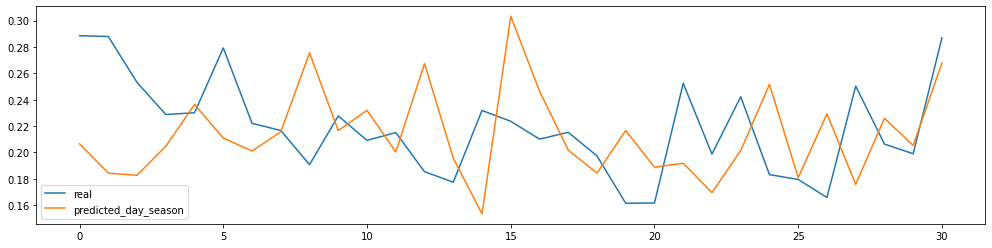

In [17]:
class ExpTrendMultiSeason:
    
    def __init__(self, s, alpha=[0.5, 0.5]):
        self.error_v = None
        self.s = s
        self.alpha = [0.5, 0.5, 0.5]
        self.y = None
        

    def predict(self, d):
        n =  self.y.shape[0]
        a = np.zeros(n)
        r = np.ones(n)
        theta = np.zeros(n)
        for t in range(self.s):
            theta[t] = self.y[t]
            a[t] = self.y[t]

        for t in range(self.s, n):
            a[t] = self.alpha[0] * (self.y[t] / theta[t - self.s]) + (1 - self.alpha[0]) * (a[t - 1] * r[t - 1])
            r[t] = self.alpha[1] * (a[t] / a[t - 1] ) + (1 - self.alpha[1]) * r[t - 1]
            theta[t] = self.alpha[2] * (self.y[t] / a[t]) + (1 - self.alpha[2]) * theta[t - self.s]

        y_predicted = pd.Series(np.concatenate((self.y, np.zeros(d))))
        for t in range(n, n + d):
            y_predicted[t] = (a[t - d] * (r[t - d]) ** d) * theta[t - d + (d % self.s) - self.s]
        return np.array(y_predicted[n:])

    def fit(self, y, d):
        self.y = y
        min_error = 100000

        for alpha in range(10):
            for beta in range(10):
                for gamma in range(10):
                    train = self.y[:-d]
                    test = self.y[-d:]
                    predicted_next_values = self.__test_predict(np.array([alpha/10, beta/10, gamma/10]), len(test))
                    e = error_vec(predicted_next_values, np.array(test))
                    if e.mean() < min_error:
                        min_error = e.mean()
                        self.error_v = e
                        self.alpha = np.array([alpha/10, beta/10, gamma/10])
                    
    def __test_predict(self, alpha, d):
        n = self.y.shape[0]
        a = np.zeros(n)
        r = np.ones(n)
        theta = np.zeros(n)
        for t in range(self.s):
            theta[t] = self.y[t]
            a[t] = self.y[t]

        for t in range(self.s, n):
            a[t] = alpha[0] * (self.y[t] / theta[t - self.s]) + (1 - alpha[0]) * (a[t - 1] * r[t - 1])
            r[t] = alpha[1] * (a[t] / a[t - 1] ) + (1 - alpha[1]) * r[t - 1]
            theta[t] = alpha[2] * (self.y[t] / a[t]) + (1 - alpha[2]) * theta[t - self.s]

        y_predicted = pd.Series(np.concatenate((self.y, np.zeros(d))))
        for t in range(n, n + d):
            y_predicted[t] = (a[t - d] * (r[t - d]) ** d) * theta[t - d + (d % self.s) - self.s]
        return np.array(y_predicted[n:])

          
        
model = ExpTrendMultiSeason(s_day)

model.fit(data['values'][idx_start:idx_end], d)
print(model.alpha)
predicted_next_values_day = model.predict(d)

real_next_values = np.array(data['values'][idx_end:])

results_predict = pd.DataFrame(
    data={
        "real": real_next_values,
        "predicted_day_season": predicted_next_values_day,

    }
)
print(MRE(predicted_next_values_day, real_next_values))
print(abs((predicted_next_values_day-1).sum() - (real_next_values).sum())/(real_next_values).sum())
results_predict.plot(figsize=(17, 4))

0.4
31 31
3.3789164178285036
1.0519481037083178


<AxesSubplot:>

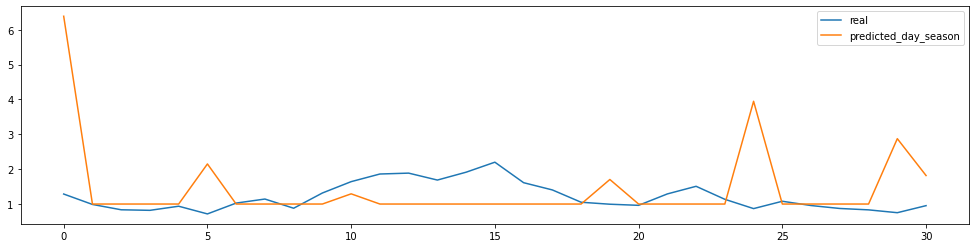

In [154]:
class AutoRegression:
    def __init__(self, alpha):
        self.alpha = alpha
        
    def predict(self, d): # d - горизонт прогнозирования
        n = self.y.shape[0]
        for t in range(n, n+d):
            self.y_predicted[t] = sum(self.w[j] * self.y_predicted[t - j - 1] for j in range(d))
            if self.y_predicted[t] < 1:
                self.y_predicted[t] = 1
        return np.array(self.y_predicted[n:])
    
    def fit(self, y, d):
        self.y = y
        n = self.y.shape[0]

        k = d
        self.w = np.random.random(k)
        self.eps = np.zeros(n)
        self.h = np.zeros(n)
        self.error_v = np.zeros(k)
        self.y_predicted = np.concatenate((self.y, np.zeros(d)))

        for t in range(k, n):
            self.y_predicted[t] = sum(self.w[j] * self.y_predicted[t - j - 1] for j in range(k))
            self.h[t] = self.alpha / sum(self.y_predicted[t - j - 1]**2 for j in range(k))
            y_ = np.array([self.y_predicted[t - j - 1] for j in range(k)])
            self.eps[t] = self.y[t] - self.y_predicted[t]
            self.w += self.h[t] * self.eps[t] * y_
            self.y_predicted[t] = sum(self.w[j] * self.y_predicted[t - j - 1] for j in range(k))
            if n-k <= t < n:
                self.error_v[t-n+k] = abs(self.y[t] - self.y_predicted[t])

            
        
model = AutoRegression(0.4)

model.fit(data['values'][idx_start_reg:idx_end], d)
print(model.alpha)
predicted_next_values_day = model.predict(d)

real_next_values = np.array(data['values'][idx_end:])
print(len(predicted_next_values_day), len(real_next_values))
results_predict = pd.DataFrame(
    data={
        "real": real_next_values,
        "predicted_day_season": predicted_next_values_day,

    }
)
print(MRE(predicted_next_values_day-1, real_next_values-1))
print(abs((predicted_next_values_day-1).sum() - (real_next_values-1).sum())/(real_next_values-1).sum())
results_predict.plot(figsize=(17, 4))

0.25573303518612833
0.11677410485781778


<AxesSubplot:>

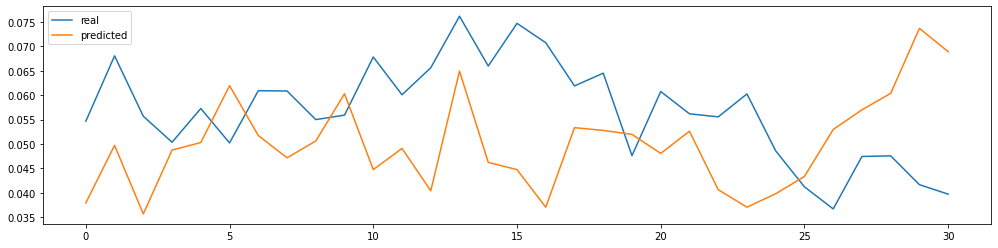

In [149]:
class Composition:
    def __init__(self, models):
        self.models = models

    def fit(self, y, d):  # y - массив размерности равной размерности models. Некоторые модели требуют разную длину длину train выборки
        self.y = y
        self.errors = np.ndarray((len(self.models), d))
        for i in range(len(self.models)):
             self.errors[i] = self.models[i].fit_composition(self.y, d)
        
        self.errors[np.isclose(self.errors, 0)] = 0.0001
        self.weights = np.power(1/self.errors, 5)/(np.power((1/self.errors), 5).sum(axis=0)).reshape(1, -1)
        self.weights[self.weights < 0] = 0
            
    def predict(self, d):
        self.preds =  np.array(list(map(lambda x: x.predict(d), self.models)))
        pred_final = (self.preds*self.weights).sum(axis=0)
        return pred_final
    

comp_models = []

for alpha in range(0, 10):
    for beta in range(0, 10):
        comp_models.append(NoTrendMultiSeason(s_day, [alpha/10, beta/10]))
        comp_models.append(NoTrendMultiSeason(s_week, [alpha/10, beta/10]))
        
        comp_models.append(NoTrendMultySeasonTriggLynch(s_day, [alpha/10, beta/10]))
        comp_models.append(NoTrendMultySeasonTriggLynch(s_week, [alpha/10, beta/10]))


composition = Composition(comp_models)
composition.fit(data['values'][idx_start: idx_end], d)

preds = composition.predict(d)
real_next_values = np.array(data['values'][idx_end:])
results_predict = pd.DataFrame(
    data={
        "real": real_next_values,
        "predicted": preds
    }
)

print(MRE(preds, real_next_values))
print(abs(preds.sum() - real_next_values.sum())/(real_next_values.sum()))
results_predict.plot(figsize=(17, 4))

In [16]:


def full_test(data, real_data, train_size, d, step_size, model):
    result = minimize(
    lambda x: optimize_alpha(x, s_week, data[0:train_size], data[train_size:train_size+d], d),
    x0=np.array([0.5, 0.5]),
    bounds=[(0, 1), (0, 1)]
    )
    alpha_optimized = result.x

    model.fit(data[idx_start:idx_end], alpha_optimized)
    data_size = data.shape[0]
    first_id = 0
    last_id = train_size+d
    num_of_sets = 0
    sum_of_errors = 0
    print(data_size)
    errors = []
    while (last_id < data_size):
        print(last_id)
        num_of_sets = num_of_sets + 1
        real = np.array(real_data[first_id+train_size:last_id])
        result = minimize(
            lambda x: optimize_alpha(x, s_week, data[first_id:first_id+train_size], data[first_id+train_size:last_id], d),
            x0=np.array([0.5, 0.5]),
            bounds=[(0, 1), (0, 1)]
        )
        alpha_optimized = result.x
        model.fit(data[first_id:first_id+train_size], alpha_optimized)
        predicted = model.predict(d)*48
        current_error = abs(real.sum()-predicted.sum())/real.sum()
        print(current_error)
        errors.append(current_error)
        first_id = first_id + step_size
        last_id = last_id + step_size
    if(num_of_sets > 0):
        return np.median(np.array(errors))
    else:
        return 0

In [17]:
winters_model = WintersNoTrend(s_week)
winters_model.fit(data['values'][idx_start:idx_end], alpha_optimized)
full_test(data['values'], data_real['values'], 30*3, 30, 10, winters_model)

427
120
0.0014612478655410572
130
0.17214675233803195
140
0.277155408709886
150
0.290079709425931
160
0.22523638487496492
170
0.09764218300893436
180
0.039583981342276225
190
0.04778381352065822
200
0.03779302258467588
210
0.19034290012666794
220
0.41389677685650317
230
0.13535752366136436
240
0.03118665352860302
250
0.23293950960083185
260
0.3002006485494064
270
0.2182322723386918
280
0.011596374319544273
290
0.07628346083488231
300
0.08807555182355364
310
0.1549244488807924
320
0.13409320516011494
330
0.12337542802565243
340
0.019615124081248683
350
0.038948719164799014
360
0.022757862742420826
370
0.04068950539173032
380
0.08917801715044901
390
0.26075557164922386
400
0.13253282415593334
410
0.051828313910844886
420
0.08207466129961025


0.09764218300893436

In [10]:
#Максимальный объем - 1000 дней с начальной даты (специфика сайта). Парсит с http://pogoda-service.ru/archive_gsod_res.php

import pandas as pd
import requests

#search_city - str на русском (пр. 'Санкт-Петербург')
#first_date и last_date - формат datetime

def parse_weather(search_city,first_date,last_date):
    cities_df = pd.read_csv('cities.csv', delimiter=',')
    cities_df.loc[cities_df.city == search_city]
    url = str('http://pogoda-service.ru/archive_gsod_res.php?country=RS&station='+str(cities_df.loc[cities_df.city == search_city].station.item())+'&datepicker_beg='+first_date.strftime('%d.%m.%Y')+'&datepicker_end='+last_date.strftime('%d.%m.%Y'))
    df = pd.read_html(url)[0]
    df.columns = ['date','max_temp','min_temp','mid_temp','atmo','wind','rain','ef_temp']
    df['date'] = pd.to_datetime(df['date'])
    del df['atmo'], df['wind'],  df['rain'], df['ef_temp'] #атмосферное давление, скорость ветра, осадки, эффективная темп.; особо не нужны
    return df

In [11]:

start = pd.to_datetime(data_t_cut.index[0].to_timestamp())
end = pd.to_datetime(data_t_cut.index[-2].to_timestamp())

temp_df = parse_weather('Петрозаводск', start, end)
temp_df

,date,max_temp,min_temp,mid_temp
0,2019-01-12,-2.0,-6.5,-4.2
1,2019-02-12,-2.0,-6.0,-2.4
2,2019-03-12,-2.0,-4.9,-3.6
3,2019-04-12,1.0,-5.0,-0.4
4,2019-05-12,4.0,-0.1,3.1
...,...,...,...,...
329,2020-10-25,4.0,-2.0,1.9
330,2020-10-26,9.0,-2.2,3.6
331,2020-10-27,11.0,6.1,9.5
332,2020-10-28,11.0,7.0,9.0


In [12]:
import statsmodels.api as sm
def sarima_exog(y, x, param_seasonal, d):
    x_train, x_test = x
    mod = sm.tsa.statespace.SARIMAX(y,
                                    exog = x_train.values,
                                    seasonal_order=param_seasonal,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

    results = mod.fit()

    pred_uc = results.get_forecast(exog=x_test.values, steps=d)
    pred_ci = pred_uc.conf_int()
    pred = pred_uc.predicted_mean
    return pred, pred_ci


def sarima(y, param_seasonal, d):
    mod = sm.tsa.statespace.SARIMAX(y,
                                    seasonal_order=param_seasonal,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

    results = mod.fit()

    pred_uc = results.get_forecast(steps=d)
    pred_ci = pred_uc.conf_int()
    pred = pred_uc.predicted_mean
    return pred, pred_ci




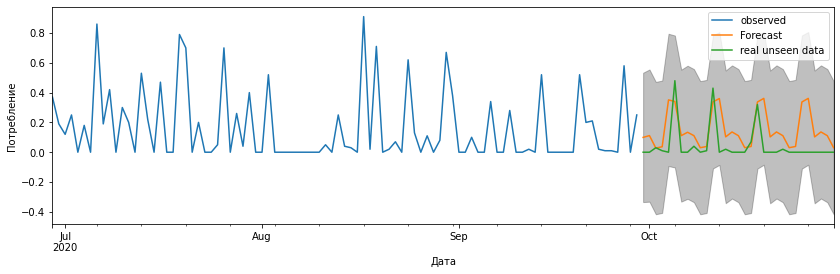

2.660553981775071
2.2892982978959515


In [13]:
y = data_t_cut['values'][idx_start: idx_end]

pred, pred_ci = sarima(y, (1, 1, 1, 7), d)

ax = y.plot(label='observed', figsize=(14, 4))
pred.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
real_data = data_t_cut[idx_end:]

ax.plot(real_data['values'], label='real unseen data')
ax.set_xlabel('Дата')
ax.set_ylabel('Потребление')
plt.legend()
plt.show()
print(MRE(pred, real_data['values'].values))
print(abs(pred.sum() - real_data['values'].values.sum())/(real_data['values'].values.sum()))

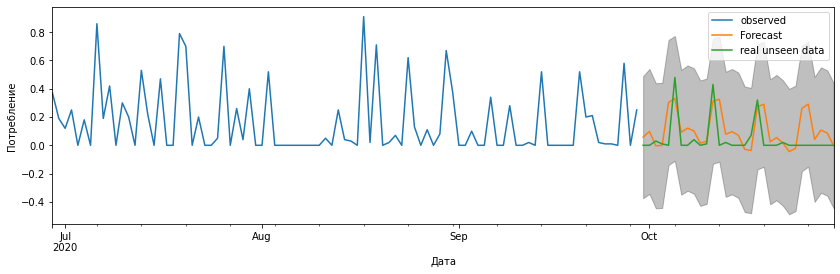

2.1251469953767677
1.3368681369873334


In [14]:
y = data_t_cut['values'][idx_start: idx_end]
t_x = temp_df['mid_temp'][idx_start: idx_end]
real_temp = temp_df['mid_temp'][idx_end:]

pred, pred_ci = sarima_exog(y, (t_x, real_temp), (1, 1, 1, 7), d)

ax = y.plot(label='observed', figsize=(14, 4))
pred.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
real_data = data_t_cut[idx_end:]

ax.plot(real_data['values'], label='real unseen data')
ax.set_xlabel('Дата')
ax.set_ylabel('Потребление')
plt.legend()
plt.show()
print(MRE(pred, real_data['values'].values))
print(abs(pred.sum() - real_data['values'].values.sum())/(real_data['values'].values.sum()))

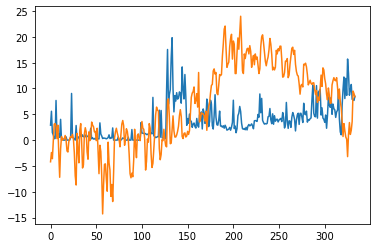

In [54]:
plt.plot(data_t_cut['values'].values)
plt.plot(temp_df['mid_temp'].values)

[0.18519354 0.04742921 0.01516424]
(31,)
0.2715753012648174
0.06001296987443387


<AxesSubplot:xlabel='date'>

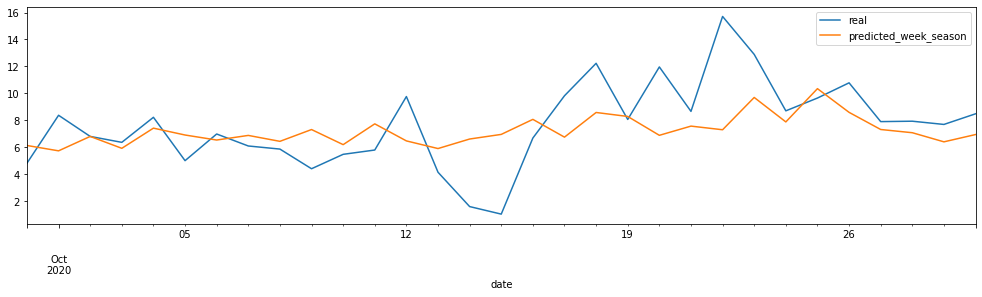

In [53]:
class WintersNoTrendAddTemp:
    def __init__(self, s):
        self.s = s # период сезонности
        self.a = None
        self.theta = None
        self.n = None
    
    def fit(self, train, temp, alpha):
        self.n = train.shape[0]
        self.temp = temp
        self.temp_weight = alpha[2]
        self.a = np.zeros(self.n)
        self.theta = np.zeros(self.n)
        m = train.min()
        
        for t in range(self.s):
            self.theta[t] = train[t]
            self.a[t] = train[t]
        
        for t in range(self.s, self.n):
            self.a[t] = alpha[0] * (train[t] / self.theta[t - self.s]) + (1 - alpha[0]) * self.a[t - 1] +self.temp_weight*self.temp[t]
            self.theta[t] = alpha[1] * (train[t] / self.a[t]) + (1 - alpha[1]) * self.theta[t - self.s]
    
    def predict(self, d=1):
        y_predicted = np.zeros(d)
        
        for t in range(self.n, self.n + d):
            y_predicted[t - self.n] = self.a[t - d] * self.theta[t - d + (d % self.s) - self.s] +self.temp_weight*self.temp[t]
        
        return y_predicted
    
def optimize_alpha(alpha, s, train_data, real_data, temp,  d):
    winters_model = WintersNoTrendAddTemp(s)
    winters_model.fit(train_data, temp, alpha)
    
    return MAE(real_data, winters_model.predict(d)) # your error function
 
    
temp_train = temp_df['mid_temp'][idx_start::]
temp_pred = temp_df['mid_temp'][idx_end:]
result = minimize(
    lambda x: optimize_alpha(x, s_week, data_t_cut['values'][idx_start:idx_end], data_t_cut['values'][idx_end::], temp_train.values, d),
    x0=np.array([0.5, 0.5, 0.9]),
    bounds=[(0, 1), (0, 1), (-1, 1)]
)
alpha_optimized = result.x
print(alpha_optimized)
winters_model = WintersNoTrendAddTemp(s_week)
winters_model.fit(data_t_cut['values'][idx_start:idx_end], temp_train.values, alpha_optimized)
                  
pred = winters_model.predict(d)
real_next_values = data_t_cut['values'][idx_end:]
print(temp_pred.values.shape)
results_predict = pd.DataFrame(
    data={
        "real": real_next_values,
        "predicted_week_season": pred

    }
)


print(MRE(pred, real_next_values))
print(abs(pred.sum() - real_next_values.sum())/(real_next_values.sum()))
results_predict.plot(figsize=(17, 4))

